In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("data.csv")

assert df.isna().sum().sum() == 0, f"Dataset contains null values"

# Dropping 'Floor' as there are way too many unique values
df = df.drop("Floor", axis=1)

# Dropping 'Area Locality' as there are 2235 unique values in 4747 records
df = df.drop("Area Locality", axis=1)

# All data comes from year 2022 within span of 4 months
df["Posted On"] = pd.to_datetime(df["Posted On"])
df["Month"] = df["Posted On"].dt.month.astype("category")
df["Day of Week"] = df["Posted On"].dt.day_of_week.astype("category")
df = df.drop("Posted On", axis=1)

# Converting to categories as these features have ~3-5 unique values
df["Area Type"] = df["Area Type"].astype("category")
df["City"] = df["City"].astype("category")
df["Furnishing Status"] = df["Furnishing Status"].astype("category")
df["Tenant Preferred"] = df["Tenant Preferred"].astype("category")
df["Point of Contact"] = df["Point of Contact"].astype("category")


print(df.describe())
print(df.dtypes)

df.head(10)

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000
BHK                     int64
Rent                    int64
Size                    int64
Area Type            category
City                 category
Furnishing Status    category
Tenant Preferred     category
Bathroom                int64
Point of Contact     category
Month                category
Day of Week          category
dtype: object


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day of Week
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,4
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,0
5,2,7000,600,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,4,4
6,2,10000,700,Super Area,Kolkata,Unfurnished,Bachelors,2,Contact Agent,6,1
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,Contact Agent,6,1
8,2,26000,800,Carpet Area,Kolkata,Unfurnished,Bachelors,2,Contact Agent,6,1
9,2,10000,1000,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,6,0


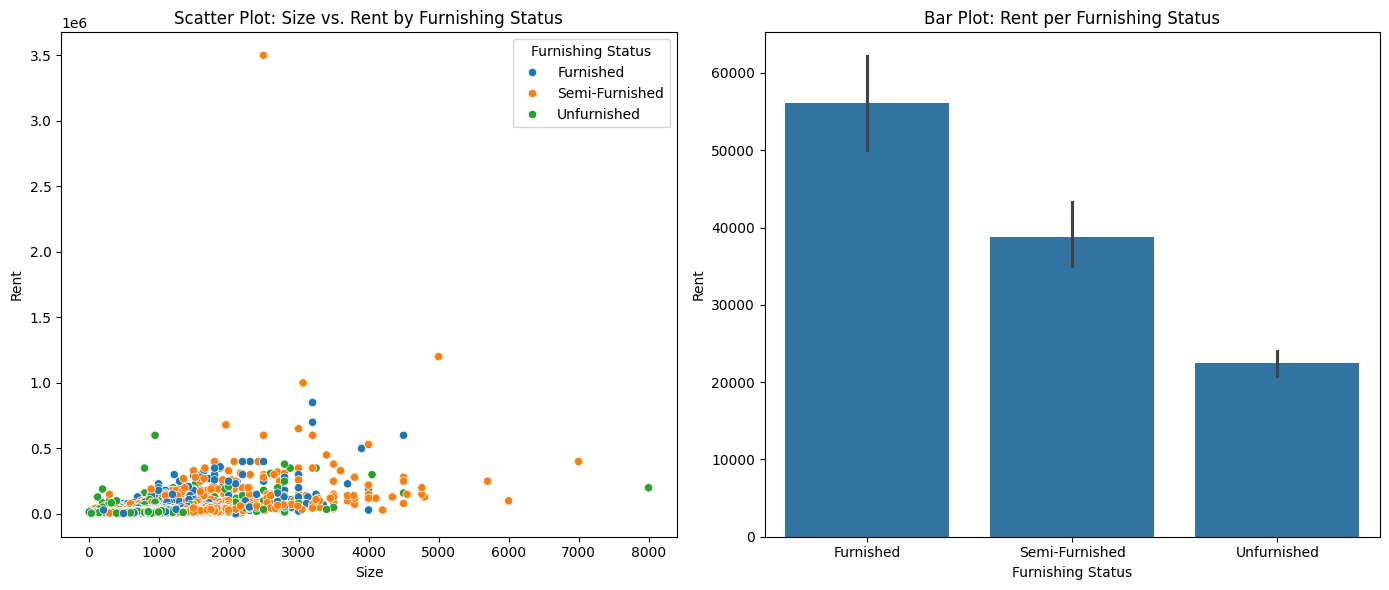

In [19]:
def rent_vs_size_per_feature(feature):
    # Scatter plot: Size vs. Rent colored by feature
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x="Size", y="Rent", data=df, hue=feature)
    plt.title(f"Scatter Plot: Size vs. Rent by {feature}")


    # Bar plot: Rent per feature
    plt.subplot(1, 2, 2)
    sns.barplot(x=feature, y="Rent", data=df)
    plt.title(f"Bar Plot: Rent per {feature}")
    plt.tight_layout()  # Ensures proper spacing between subplots

    plt.show()


rent_vs_size_per_feature("Furnishing Status")

In [20]:
z_scores_size = (df["Size"] - df["Size"].mean()) / df["Size"].std()

# Threshold for outliers acounted for z-score
outlier_threshold = 3.5

outliers_indices_size = z_scores_size.abs() > outlier_threshold

# Remove outliers from 'Size' to get rid of ~ 60 outliers
df = df[~outliers_indices_size]

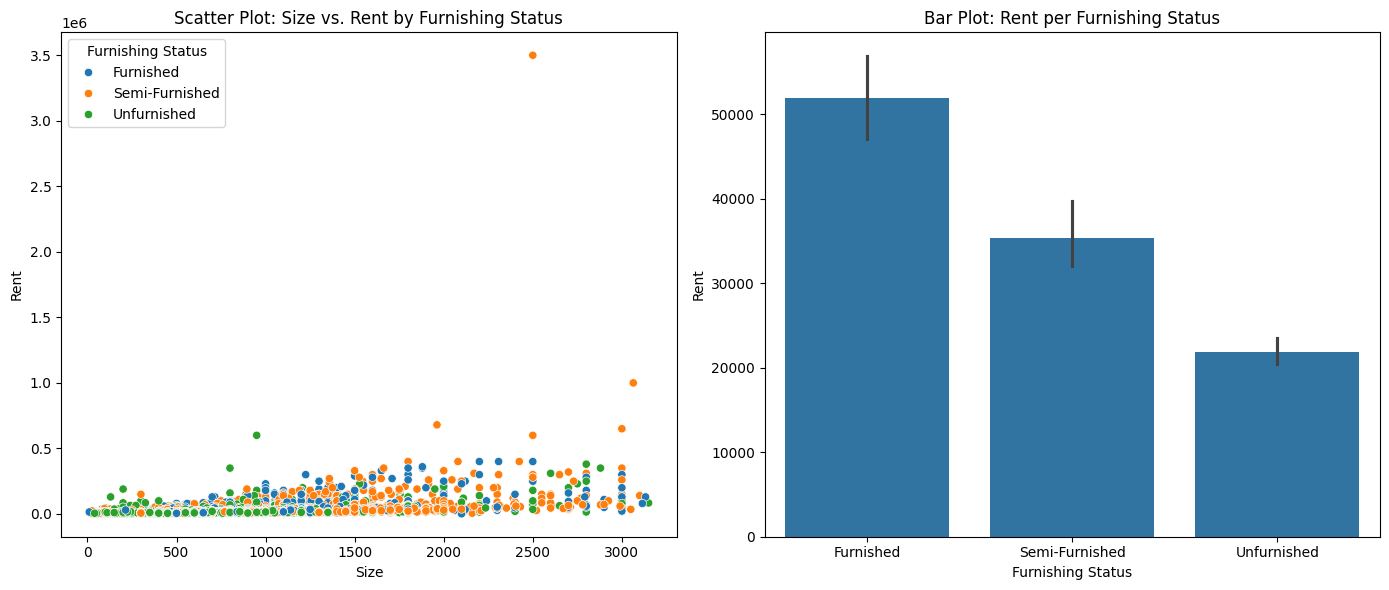

In [21]:
rent_vs_size_per_feature("Furnishing Status")

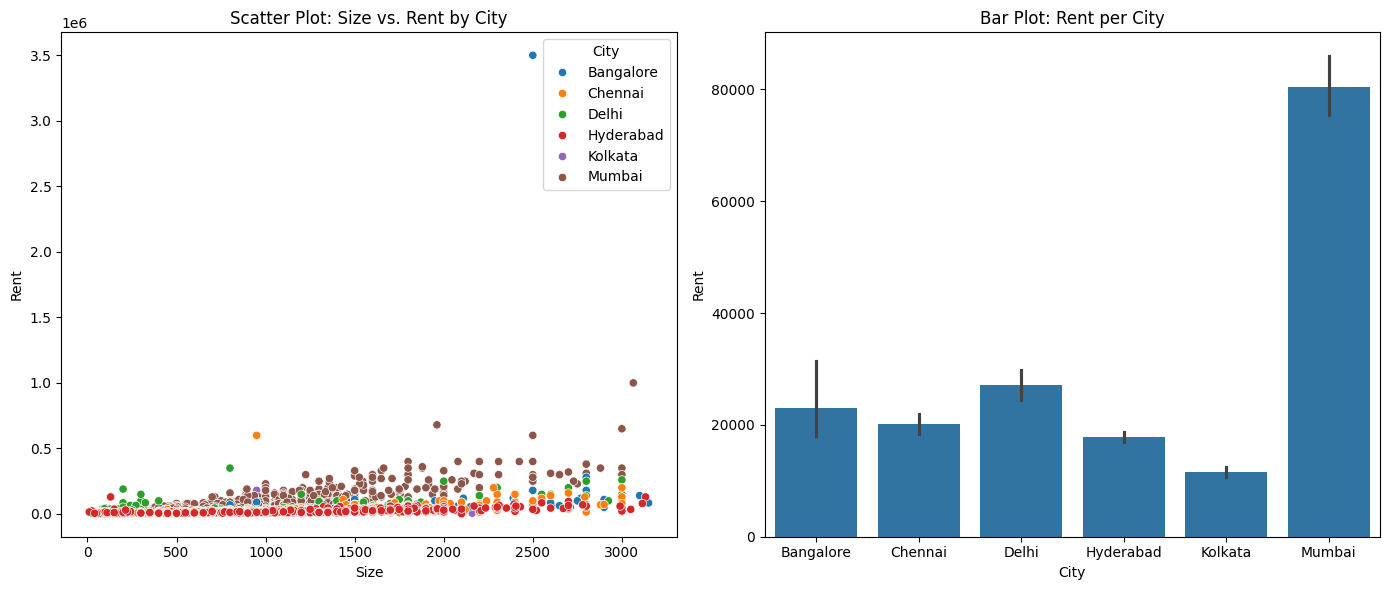

In [22]:
rent_vs_size_per_feature("City")

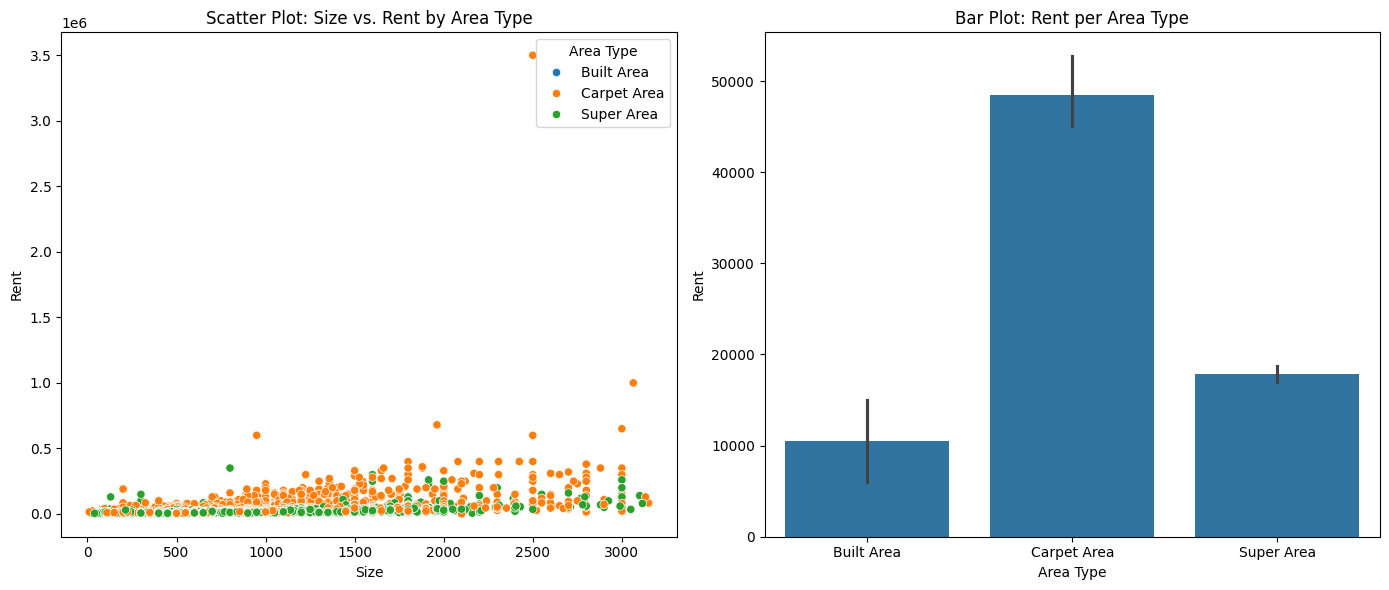

In [23]:
rent_vs_size_per_feature("Area Type")

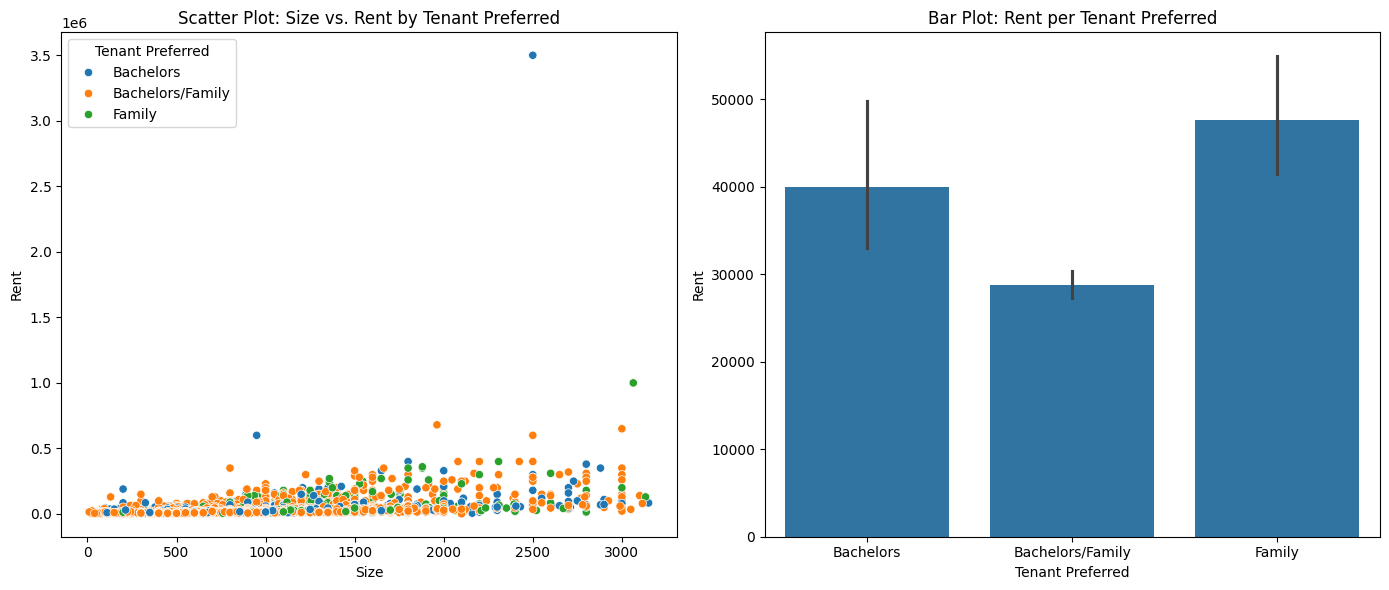

In [24]:
rent_vs_size_per_feature("Tenant Preferred")

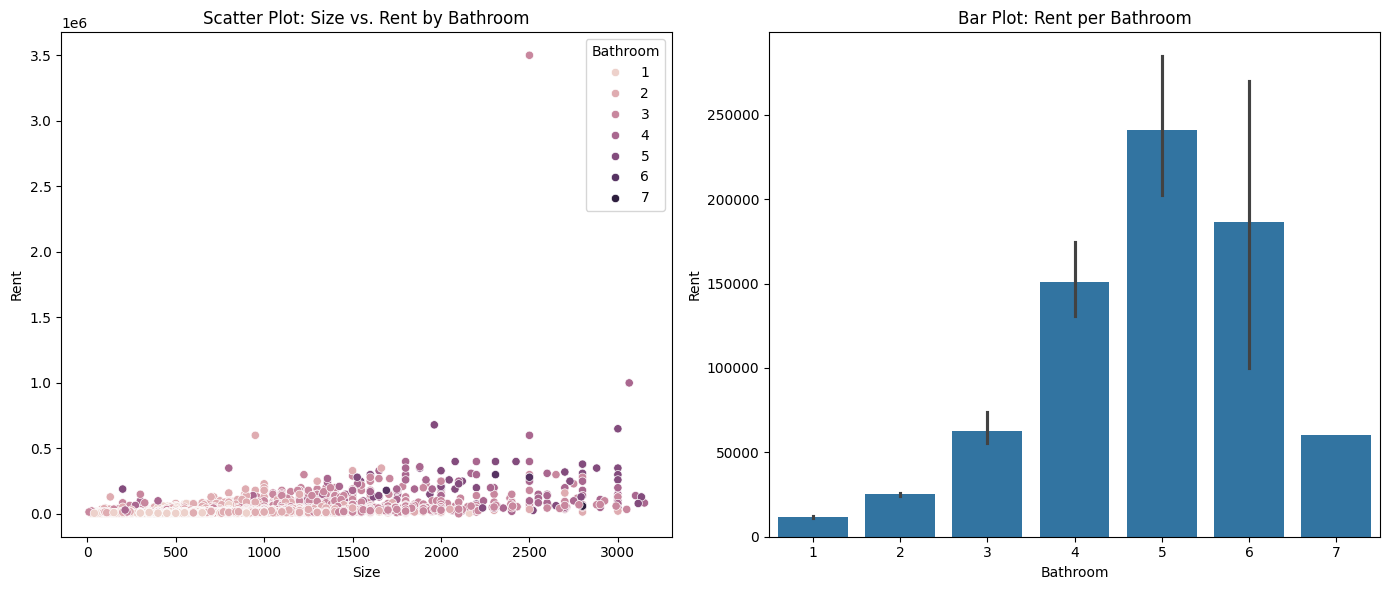

In [25]:
rent_vs_size_per_feature("Bathroom")

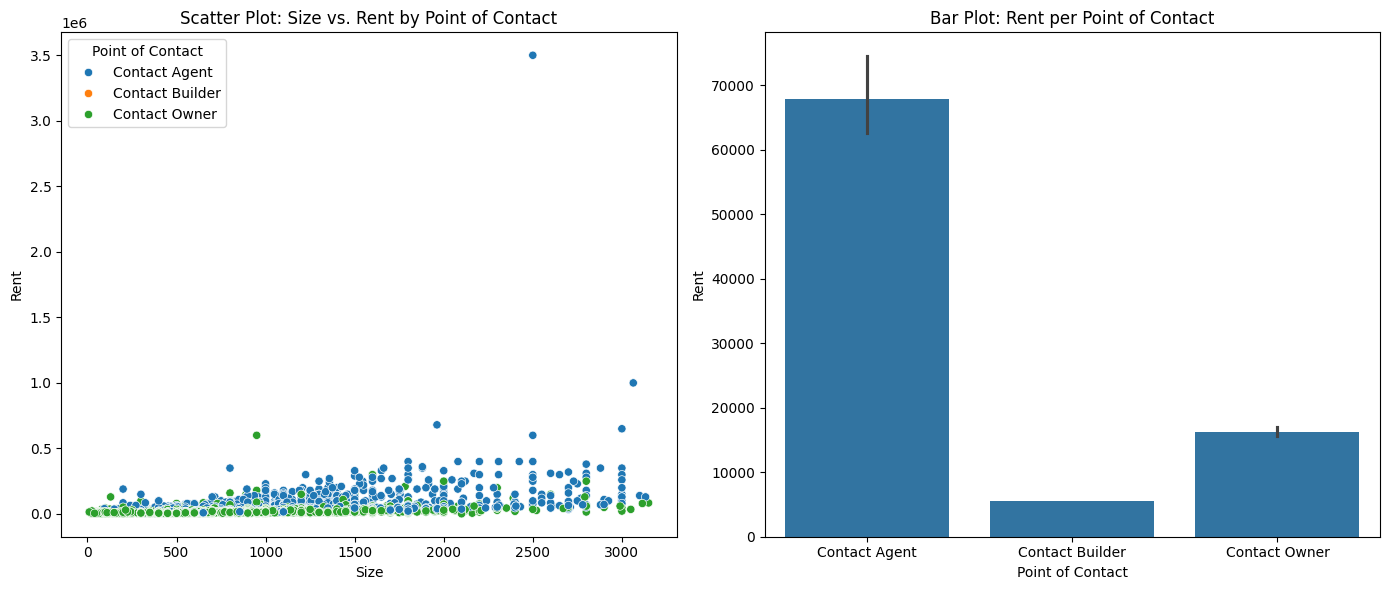

In [26]:
rent_vs_size_per_feature("Point of Contact")